In [3]:
%matplotlib inline
import math, sys, os, numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [4]:
def lin(a,b,x):
    return a*x+b

# The parameters.
a = 3
b = 8

n = 30
x = random(n)
y = lin(a,b,x)

In [5]:
print(x)

[ 0.7533  0.8001  0.8805  0.396   0.2642  0.5082  0.4053  0.5957  0.5531  0.1103  0.3789  0.8519
  0.8724  0.4053  0.4549  0.4093  0.4141  0.5152  0.3483  0.761   0.5874  0.2196  0.9198  0.5922
  0.4062  0.6504  0.4512  0.1039  0.5206  0.3749]


In [6]:
print(y)

[ 10.26    10.4002  10.6416   9.1881   8.7927   9.5247   9.2158   9.7872   9.6594   8.331    9.1367
  10.5558  10.6173   9.216    9.3647   9.2279   9.2422   9.5457   9.0448  10.283    9.7623   8.6588
  10.7593   9.7765   9.2186   9.9511   9.3536   8.3118   9.5618   9.1246]


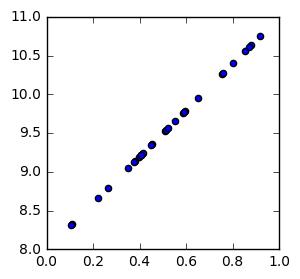

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y, y_pred):
    return((y-y_pred)**2).sum()

def loss(y,a,b,x):
    return sse(y, lin(a,b,x))

def avg_loss(y,a,b,x):
    return np.sqrt(loss(y, a, b, x)/n)

In [9]:
a_guess = -1.
b_guess = 1.
avg_loss(y, a_guess, b_guess, x)

9.1084

In [10]:
lr = 0.01

# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
#     print("dydb", dydb)
    dyda = x * dydb
#     print("dyda", dyda)
    a_guess -= lr*dyda.mean()
    print("a_guess", a_guess)
    b_guess -= lr*dydb.mean()
    print("b_guess", b_guess)

In [12]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10):
        upd()
        return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani

a_guess -0.90253798874
b_guess 1.18134501971
a_guess -0.807562180403
b_guess 1.35805574683
a_guess -0.715009067723
b_guess 1.53025056524
a_guess -0.624816765719
b_guess 1.69804483471
a_guess -0.536924970253
b_guess 1.86155096817
a_guess -0.451274917647
b_guess 2.02087850696
a_guess -0.367809345335
b_guess 2.17613419419
a_guess -0.286472453514
b_guess 2.32742204625
a_guess -0.20720986778
b_guess 2.47484342241
a_guess -0.129968602717
b_guess 2.61849709276
a_guess -0.0546970264112
b_guess 2.7584793043
a_guess 0.018655174119
b_guess 2.8948838454
a_guess 0.0901370266178
b_guess 3.02780210864
a_guess 0.159796306423
b_guess 3.15732315196
a_guess 0.227679568457
b_guess 3.28353375834
a_guess 0.293832178405
b_guess 3.40651849389
a_guess 0.358298343091
b_guess 3.52635976449
a_guess 0.421121140083
b_guess 3.64313787097
a_guess 0.482342546538
b_guess 3.75693106287
a_guess 0.542003467313
b_guess 3.86781559087
a_guess 0.600143762358
b_guess 3.97586575783
a_guess 0.656802273404
b_guess 4.08115396853
a

In [15]:
x = random((30,2))
y = np.dot(x, [2., 3.]) + 1.
x[:5]

array([[ 0.5021,  0.3029],
       [ 0.1263,  0.6864],
       [ 0.6505,  0.176 ],
       [ 0.5532,  0.5433],
       [ 0.1804,  0.404 ]])

In [16]:
len(y)

30

In [21]:
import json
from glob import glob
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

# One output where the input contains 2 values at a time.
lm = Sequential([ Dense(1, input_shape=(2,))])

# Before the model is trained, the learning process needs to be configured. That is done via the compile method.

# Arguments it takes are
# optimizer : Standard Gradient Descent
# Loss Function To Minimize : Mean Squared Error. 
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [22]:
# This evaluation occurs to determine how big the loss is in the newly initialized weights.
lm.evaluate(x,y, verbose=1)

30/30 [==============================] - 0s


6.4060

In [23]:
# The fit function takes in an input and output at a time and 
# Trains the model on the numbe
lm.fit(x, y, nb_epoch=5, batch_size=1)

Epoch 1/5
30/30 [==============================] - 0s - loss: 0.0225     
Epoch 2/5
30/30 [==============================] - 0s - loss: 0.0121     
Epoch 3/5
30/30 [==============================] - 0s - loss: 0.0064     
Epoch 4/5
30/30 [==============================] - 0s - loss: 0.0035     
Epoch 5/5
30/30 [==============================] - 0s - loss: 0.0020     


In [24]:
lm.evaluate(x, y, verbose=0)

0.0010

In [25]:
lm.get_weights()

[array([[ 1.8921],
        [ 2.9459]], dtype=float32), array([ 1.0989], dtype=float32)]